In [2]:
import numpy as np
import pandas as pd
import csv
import re
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
!pip install pyttsx3

In [4]:
import pyttsx3

In [5]:
engine = pyttsx3.init()

In [6]:
def text_to_speech(text):
    engine.setProperty('rate', 150)    # Speed percent (can go over 100)
    engine.setProperty('volume', 0.9)  # Volume 0-1
    engine.say(text)
    engine.runAndWait()

In [7]:
training = pd.read_csv('Training.csv')
testing= pd.read_csv('Testing.csv')

In [8]:
shape = training.shape
print("Shape of Training dataset: ", shape)

Shape of Training dataset:  (4920, 133)


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
null_values_count = training.isnull().sum()
null_values_count

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [12]:
cols= training.columns
cols= cols[:-1]
x = training[cols]
y = training['prognosis']

In [13]:
reduced_data = training.groupby(training['prognosis']).max()
reduced_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
reduced_data.index = reduced_data.index.str.strip()

In [15]:
set(training.prognosis)

{'(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A'}

In [16]:
reduced_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
reduced_data.to_csv("a.csv", index=False)

In [18]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [19]:
set(y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40}

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']
testy    = le.transform(testy)

In [21]:
clf1 = DecisionTreeClassifier(max_depth=45)  

clf = clf1.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv=3)
print("Mean Score: ",scores.mean())

Mean Score:  0.9698260476135262


In [22]:
# Training accuracy
train_accuracy = clf.score(x_train, y_train)

# Validation accuracy using cross-validation
val_accuracy = scores.mean()

print(f"Training Accuracy: {train_accuracy:}")
print(f"Validation Accuracy (Cross-Validation): {val_accuracy:}")


Training Accuracy: 0.9878640776699029
Validation Accuracy (Cross-Validation): 0.9698260476135262


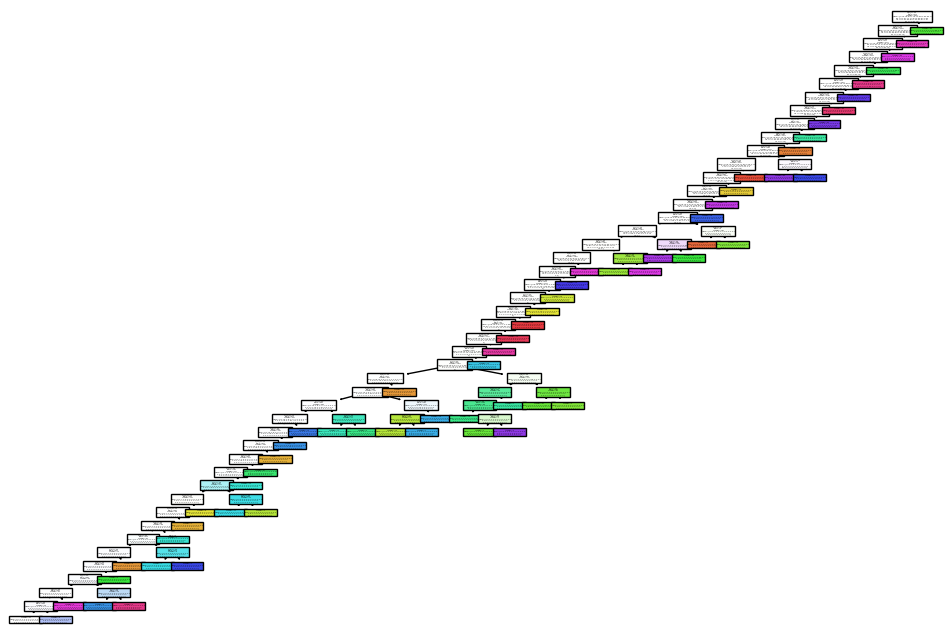

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True)
plt.show()


In [24]:
from sklearn.metrics import accuracy_score

# Predicting on the test set
y_pred = clf.predict(x_test)

# Calculating accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Printing accuracy
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.9766009852216748


In [25]:
# Ensure features is properly defined
features = x_train.columns if hasattr(x_train, 'columns') else [f"Feature {i}" for i in range(x_train.shape[1])]

importances = clf.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {features[i]} importance: {imp:.4f}")


Feature itching importance: 0.0234
Feature skin_rash importance: 0.0033
Feature nodal_skin_eruptions importance: 0.0251
Feature continuous_sneezing importance: 0.0000
Feature shivering importance: 0.0236
Feature chills importance: 0.0000
Feature joint_pain importance: 0.0016
Feature stomach_pain importance: 0.0220
Feature acidity importance: 0.0000
Feature ulcers_on_tongue importance: 0.0000
Feature muscle_wasting importance: 0.0000
Feature vomiting importance: 0.0031
Feature burning_micturition importance: 0.0000
Feature spotting_ urination importance: 0.0018
Feature fatigue importance: 0.0011
Feature weight_gain importance: 0.0000
Feature anxiety importance: 0.0000
Feature cold_hands_and_feets importance: 0.0000
Feature mood_swings importance: 0.0006
Feature weight_loss importance: 0.0246
Feature restlessness importance: 0.0000
Feature lethargy importance: 0.0000
Feature patches_in_throat importance: 0.0226
Feature irregular_sugar_level importance: 0.0000
Feature cough importance: 0.

In [26]:
importances = clf.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {features[i]} importance: {imp:.4f}")


Feature itching importance: 0.0234
Feature skin_rash importance: 0.0033
Feature nodal_skin_eruptions importance: 0.0251
Feature continuous_sneezing importance: 0.0000
Feature shivering importance: 0.0236
Feature chills importance: 0.0000
Feature joint_pain importance: 0.0016
Feature stomach_pain importance: 0.0220
Feature acidity importance: 0.0000
Feature ulcers_on_tongue importance: 0.0000
Feature muscle_wasting importance: 0.0000
Feature vomiting importance: 0.0031
Feature burning_micturition importance: 0.0000
Feature spotting_ urination importance: 0.0018
Feature fatigue importance: 0.0011
Feature weight_gain importance: 0.0000
Feature anxiety importance: 0.0000
Feature cold_hands_and_feets importance: 0.0000
Feature mood_swings importance: 0.0006
Feature weight_loss importance: 0.0246
Feature restlessness importance: 0.0000
Feature lethargy importance: 0.0000
Feature patches_in_throat importance: 0.0226
Feature irregular_sugar_level importance: 0.0000
Feature cough importance: 0.

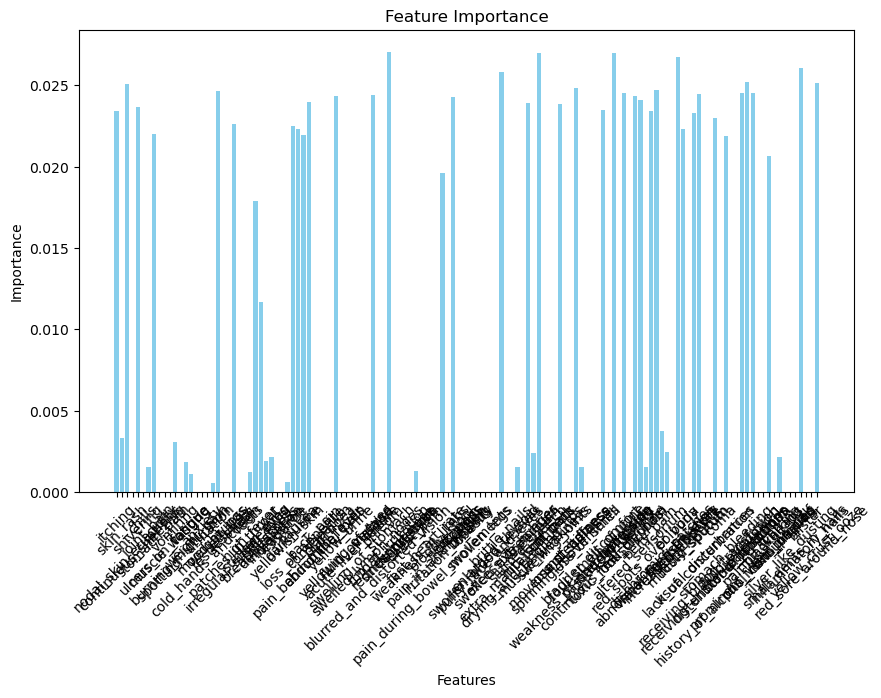

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()


In [28]:
path = clf1.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train and validate models with different pruning levels
clfs = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train)
    clfs.append(tree)

# Compare performance for each alpha
train_scores = [tree.score(x_train, y_train) for tree in clfs]
test_scores = [cross_val_score(tree, x_test, y_test, cv=3).mean() for tree in clfs]

print(f"Best model test score: {max(test_scores):.2f}")


Best model test score: 0.97


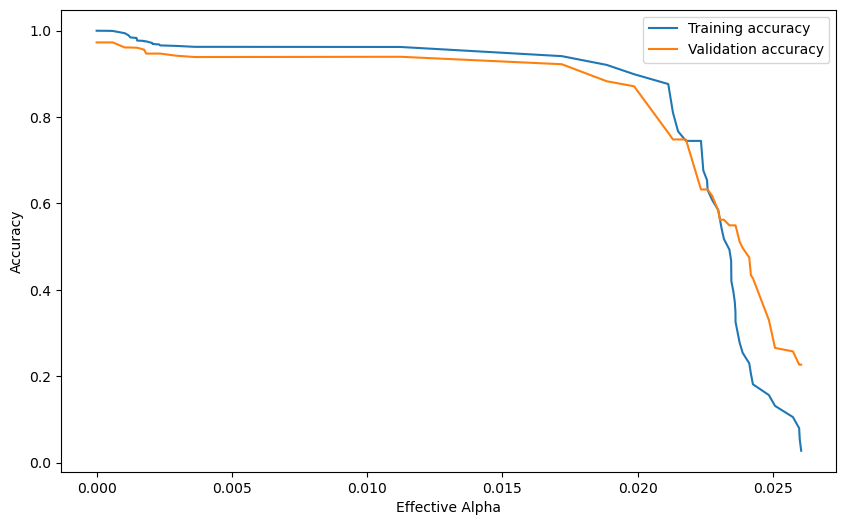

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Training accuracy")
plt.plot(ccp_alphas, test_scores, label="Validation accuracy")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [30]:
model = SVC(C=0.1, kernel='rbf')

model.fit(x_train,y_train)
print("Accuracy score for svm: ", model.score(x_test,y_test))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

Accuracy score for svm:  1.0


In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Feature scaling for models that are sensitive to feature magnitudes
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# --- SVM Model with Higher C and Linear Kernel ---
svm_model = SVC(C=1.0, kernel='linear', random_state=42)
svm_model.fit(x_train_scaled, y_train)
svm_train_score = svm_model.score(x_train_scaled, y_train)
svm_test_score = svm_model.score(x_test_scaled, y_test)

# --- Random Forest Model with Regularization ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)
rf_model.fit(x_train, y_train)  # No scaling needed for Random Forest
rf_train_score = rf_model.score(x_train, y_train)
rf_test_score = rf_model.score(x_test, y_test)

# --- K-Nearest Neighbors Model with More Neighbors ---
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train_scaled, y_train)
knn_train_score = knn_model.score(x_train_scaled, y_train)
knn_test_score = knn_model.score(x_test_scaled, y_test)

# --- Cross-Validation using Stratified K-Fold (to balance class distribution) ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv_score = cross_val_score(svm_model, x_train_scaled, y_train, cv=cv).mean()
rf_cv_score = cross_val_score(rf_model, x_train, y_train, cv=cv).mean()
knn_cv_score = cross_val_score(knn_model, x_train_scaled, y_train, cv=cv).mean()

# --- Results ---
print(f"SVM Model Test Accuracy: {svm_test_score}")
print(f"Random Forest Model Test Accuracy: {rf_test_score}")
print(f"KNN Model Test Accuracy: {knn_test_score}")

print(f"SVM Model Cross-Validation Score: {svm_cv_score}")
print(f"Random Forest Model Cross-Validation Score: {rf_cv_score}")
print(f"KNN Model Cross-Validation Score: {knn_cv_score}")


SVM Model Test Accuracy: 1.0
Random Forest Model Test Accuracy: 1.0
KNN Model Test Accuracy: 0.9979674796747967
SVM Model Cross-Validation Score: 1.0
Random Forest Model Cross-Validation Score: 0.9994917407878017
KNN Model Cross-Validation Score: 0.9974596714375092


In [32]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()
symptoms_dict = {}
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")


def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

            
def getSeverityDict():
    global severityDictionary
    with open('Symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass




def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [33]:
import pandas as pd

# Ensure data integrity
data = {
    "Disease": [
        "(vertigo) Paroymsal  Positional Vertigo", "AIDS", "Acne", "Alcoholic hepatitis", "Allergy", "Arthritis", 
        "Bronchial Asthma", "Cervical spondylosis", "Chicken pox", "Chronic cholestasis", "Common Cold", "Dengue", 
        "Diabetes", "Dimorphic hemmorhoids(piles)", "Drug Reaction", "Fungal infection", "GERD", 
        "Gastroenteritis", "Heart attack", "Hepatitis B", "Hepatitis C", "Hepatitis D", "Hepatitis E", 
        "Hypertension", "Hyperthyroidism", "Hypoglycemia", "Hypothyroidism", "Impetigo", "Jaundice", "Malaria", "Migraine", 
        "Osteoarthristis", "Paralysis (brain hemorrhage)", "Peptic ulcer disease", "Pneumonia", "Psoriasis", "Tuberculosis", 
        "Typhoid", "Urinary tract infection", "Varicose veins", "hepatitis A"
    ],
    "Medicine": [
        "Meclizine and Betahistine", "Tenofovir and Emtricitabine and Efavirenz", "Tretinoin and Adapalene and Doxycycline and Minocycline", 
        "Prednisolone and Pentoxifylline", "Diphenhydramine and Loratadine and Fluticasone", "Ibuprofen and Naproxen and Methotrexate", 
        "Salbutamol and Fluticasone and Budesonide", "Ibuprofen and Cyclobenzaprine", "Acyclovir and Calamine lotion", 
        "Ursodeoxycholic acid", "Paracetamol and Saline nasal spray and Pseudoephedrine", "Paracetamol and Oral rehydration salts", 
        "Insulin glargine and Insulin lispro and Metformin and Glipizide", "Hydrocortisone cream and Docusate sodium", 
        "Hydrocortisone and Diphenhydramine", "Clotrimazole and Fluconazole", "Omeprazole and Esomeprazole and Ranitidine", 
        "Oral rehydration salts and Ondansetron", "Aspirin and Clopidogrel and Atenolol and Atorvastatin", 
        "Tenofovir and Entecavir", "Sofosbuvir and Ledipasvir and Daclatasvir", "Pegylated interferon alpha", "Ribavirin and Supportive care", 
        "Lisinopril and Ramipril and Amlodipine and Hydrochlorothiazide", "Methimazole and Propylthiouracil and Propranolol", 
        "Glucose tablets and Glucagon", "Levothyroxine and Euthyrox and Synthroid", "Mupirocin and Retapamulin", 
        "Supportive care and Antibiotics (for infections) and Antivirals (for hepatitis)", 
        "Artesunate and Chloroquine and Artemisinin-based combination therapies (ACTs)", "Sumatriptan and Rizatriptan and Ibuprofen", 
        "Ibuprofen and Diclofenac and Glucosamine sulfate", "Rehabilitation therapy and Paracetamol and Anticoagulants (if required)", 
        "Omeprazole and Lansoprazole and Ranitidine and Clarithromycin and Amoxicillin", "Amoxicillin and Levofloxacin and Oseltamivir", 
        "Betamethasone and Fluocinonide and Calcipotriene and Adalimumab and Etanercept", 
        "Isoniazid and Rifampin and Pyrazinamide and Ethambutol", "Ciprofloxacin and Ceftriaxone", "Ciprofloxacin and Nitrofurantoin", 
        "Compression stockings and Sclerotherapy and Endovenous laser therapy (EVLT) and Surgery", "Supportive care and Vaccination"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_file_path = "diseases_and_medicines17.csv"
df.to_csv(csv_file_path, index=False)

# Return the file path
csv_file_path

'diseases_and_medicines17.csv'

In [34]:
def getMedicineDict():
    global medicineDictionary
    with open('diseases_medicines17.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            medicineDictionary[row[0]] = row[1]

# Function to retrieve medicine recommendations
def getMedicine(disease):
    if disease in medicineDictionary:
        print(f"Recommended medicine for {disease}: {medicineDictionary[disease]}")
    else:
        print(f"No medicine information available for {disease}")

In [35]:
def getInfo():
    print("-----------------------------------MEDIFORECASTER-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello", name)

In [36]:
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [37]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)
    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [38]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero()
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [39]:
#use this
import pyttsx3
import csv
from sklearn.tree import _tree

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Function to traverse the decision tree and make predictions
def tree_to_code(tree, feature_names):
    # Get the underlying tree structure from the classifier
    tree_ = tree.tree_

    # Map feature indices to feature names for easy reference
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    # Prepare a list of symptom names for validation
    chk_dis = ",".join(feature_names).split(",")
    symptoms_present = []  # List to hold symptoms present during the recursion

    while True:
        # Use text-to-speech to prompt the user for input
        engine.say("Enter the symptom you are experiencing.")
        engine.runAndWait()

        # Get the user input for symptoms
        print("Enter the symptom you are experiencing: ", end="-> ")
        disease_input = input("")  # Read user input

        # Check if the input matches any known symptoms
        conf, cnf_dis = check_pattern(chk_dis, disease_input)
        if conf == 1:  # If a match is found
            print("Searches related to input:")
            for num, it in enumerate(cnf_dis):
                print(num, ")", it)  # Display matching symptoms

            # If multiple symptoms are found, ask the user to select one
            if num != 0:
                print(f"Select the one you meant (0 - {num}): ", end="")
                conf_inp = int(input(""))  # Get the user's selection
            else:
                conf_inp = 0  # Default selection if only one match is found

            # Update disease_input to the confirmed symptom
            disease_input = cnf_dis[conf_inp]
            break  # Exit the loop after valid input
        else:
            print("Enter a valid symptom.")  # Prompt for valid input

    while True:
        try:
            # Ask the user how many days they've been experiencing the symptoms
            num_days = int(input("Okay. From how many days? : "))  # Read the number of days
            break  # Exit loop on valid input
        except ValueError:
            print("Enter a valid input.")  # Prompt for valid input if there's an error

    # Recursive function to traverse the decision tree
    def recurse(node, depth):
        indent = "  " * depth  # Create indentation based on depth for clarity
        if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Check if node is a decision node
            name = feature_name[node]  # Get the feature name
            threshold = tree_.threshold[node]  # Get the threshold for the decision

            # Determine if the input symptom matches the feature
            val = 1 if name == disease_input else 0

            # Recursively traverse left or right based on the threshold
            if val <= threshold:
                recurse(tree_.children_left[node], depth + 1)  # Traverse left subtree
            else:
                symptoms_present.append(name)  # Record the symptom
                recurse(tree_.children_right[node], depth + 1)  # Traverse right subtree
        else:
            # If a leaf node is reached, get the predicted disease
            present_disease = print_disease(tree_.value[node])

            # Print the predicted disease at this step
            print(f"{indent}Predicted disease at this step: {present_disease[0]}")

            # Get relevant symptoms for the predicted disease
            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]

            # Use text-to-speech to ask the user about additional symptoms
            engine.say("Are you experiencing any symptoms?")
            engine.runAndWait()
            print("Are you experiencing any:")

            symptoms_exp = []  # List to hold additional symptoms

            # Ask the user about each of the relevant symptoms
            for syms in list(symptoms_given):
                inp = ""
                engine.say(f"{syms}, are you experiencing it?")
                engine.runAndWait()
                print(f"{syms}? : ", end='')

                while True:
                    inp = input("")  # Get user input
                    if inp in ["yes", "no"]:  # Validate input
                        break
                    else:
                        print("Provide proper answers (yes/no): ", end="")

                # Print the user's response after each inquiry
                print(f"You answered: {inp}")

                if inp == "yes":
                    symptoms_exp.append(syms)  # Add to symptoms list if the answer is yes

                # After each symptom inquiry, perform prediction
                second_prediction = sec_predict(symptoms_exp)  # Perform a second prediction
                print(f"Current prediction based on your symptoms: {present_disease[0]} or {second_prediction[0]}")

            # Evaluate the condition based on symptoms and number of days
            calc_condition(symptoms_exp, num_days)
            if present_disease[0] == second_prediction[0]:  # Compare predictions
                # If both predictions match
                engine.say(f"You may have {present_disease[0]}.")
                engine.runAndWait()
                print(f"You may have {present_disease[0]}.")
                print(description_list[present_disease[0]])  # Show disease description

            else:
                # If predictions differ, inform the user
                engine.say(f"You may have {present_disease[0]} or {second_prediction[0]}.")
                engine.runAndWait()
                print(f"You may have {present_disease[0]} or {second_prediction[0]}.")
                print(description_list[present_disease[0]])  # Show description of first disease
                print(description_list[second_prediction[0]])  # Show description of second disease

            # Display precautions for the predicted disease
            precaution_list = precautionDictionary[present_disease[0]]
            print("Take the following measures:")
            for i, j in enumerate(precaution_list):  # List precautions
                print(i + 1, ")", j)

            # Get recommended medicine for the predicted disease
            getMedicine(present_disease[0])  # Display medicine recommendations

    # Start the recursion from the root of the tree
    recurse(0, 1)

# Load medicine data from CSV
def getMedicineDict():
    global medicineDictionary
    medicineDictionary = {}
    with open('diseases_and_medicines17.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            medicineDictionary[row[0]] = row[1]

# Function to retrieve medicine recommendations
def getMedicine(disease):
    if disease in medicineDictionary:
        print(f"Recommended medicine for {disease}: {medicineDictionary[disease]}")
    else:
        print(f"No medicine information available for {disease}")

# Functions to load severity, description, precautions, and user information
getSeverityDict()  # Load severity data
getDescription()   # Load symptom descriptions
getprecautionDict()# Load precaution measures
getMedicineDict()  # Load disease-to-medicine mapping

getInfo()  # Gather user's name and greeting
tree_to_code(clf, cols)  # Call the tree_to_code function with the classifier and features

print("----------------------------------------------------------------------------------------------------------------------------------")


-----------------------------------MEDIFORECASTER-----------------------------------

Your Name? 				->ABH
Hello ABH
Enter the symptom you are experiencing: -> PAIN
Enter a valid symptom.
Enter the symptom you are experiencing: -> pain
Searches related to input:
0 ) joint_pain
1 ) stomach_pain
2 ) pain_behind_the_eyes
3 ) back_pain
4 ) abdominal_pain
5 ) chest_pain
6 ) pain_during_bowel_movements
7 ) pain_in_anal_region
8 ) neck_pain
9 ) knee_pain
10 ) hip_joint_pain
11 ) muscle_pain
12 ) belly_pain
13 ) painful_walking
Select the one you meant (0 - 13): 10
Okay. From how many days? : 7
        Predicted disease at this step: Osteoarthristis
Are you experiencing any:
joint_pain? : yes
You answered: yes
Current prediction based on your symptoms: Osteoarthristis or Psoriasis


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


neck_pain? : yes
You answered: yes
Current prediction based on your symptoms: Osteoarthristis or Cervical spondylosis


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


knee_pain? : no
You answered: no
Current prediction based on your symptoms: Osteoarthristis or Cervical spondylosis


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


hip_joint_pain? : no
You answered: no
Current prediction based on your symptoms: Osteoarthristis or Cervical spondylosis


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


swelling_joints? : yes
You answered: yes
Current prediction based on your symptoms: Osteoarthristis or Osteoarthristis


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


painful_walking? : yes
You answered: yes
Current prediction based on your symptoms: Osteoarthristis or Cervical spondylosis
You should take the consultation from doctor. 


C:\Users\kg808\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


You may have Osteoarthristis or Cervical spondylosis.
Osteoarthritis is the most common form of arthritis, affecting millions of people worldwide. It occurs when the protective cartilage that cushions the ends of your bones wears down over time.
Cervical spondylosis is a general term for age-related wear and tear affecting the spinal disks in your neck. As the disks dehydrate and shrink, signs of osteoarthritis develop, including bony projections along the edges of bones (bone spurs).
Take the following measures:
1 ) acetaminophen
2 ) consult nearest hospital
3 ) follow up
4 ) salt baths
Recommended medicine for Osteoarthristis: Ibuprofen and Diclofenac and Glucosamine sulfate
----------------------------------------------------------------------------------------------------------------------------------


In [40]:
import pyttsx3
import csv
from sklearn.tree import _tree

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Function to traverse the decision tree and make predictions
def tree_to_code(tree, feature_names):
    # Get the underlying tree structure from the classifier
    tree_ = tree.tree_

    # Map feature indices to feature names for easy reference
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    # Prepare a list of symptom names for validation
    chk_dis = ",".join(feature_names).split(",")
    symptoms_present = []  # List to hold symptoms present during the recursion

    while True:
        # Use text-to-speech to prompt the user for input
        engine.say("Enter the symptom you are experiencing.")
        engine.runAndWait()

        # Get the user input for symptoms
        print("Enter the symptom you are experiencing: ", end="-> ")
        disease_input = input("")  # Read user input

        # Check if the input matches any known symptoms
        conf, cnf_dis = check_pattern(chk_dis, disease_input)
        if conf == 1:  # If a match is found
            print("Searches related to input:")
            for num, it in enumerate(cnf_dis):
                print(num, ")", it)  # Display matching symptoms

            # If multiple symptoms are found, ask the user to select one
            if num != 0:
                print(f"Select the one you meant (0 - {num}): ", end="")
                conf_inp = int(input(""))  # Get the user's selection
            else:
                conf_inp = 0  # Default selection if only one match is found

            # Update disease_input to the confirmed symptom
            disease_input = cnf_dis[conf_inp]
            break  # Exit the loop after valid input
        else:
            print("Enter a valid symptom.")  # Prompt for valid input

    while True:
        try:
            # Ask the user how many days they've been experiencing the symptoms
            num_days = int(input("Okay. From how many days? : "))  # Read the number of days
            break  # Exit loop on valid input
        except ValueError:
            print("Enter a valid input.")  # Prompt for valid input if there's an error

    # Recursive function to traverse the decision tree
    def recurse(node, depth):
        indent = "  " * depth  # Create indentation based on depth for clarity
        if tree_.feature[node] != _tree.TREE_UNDEFINED:  # Check if node is a decision node
            name = feature_name[node]  # Get the feature name
            threshold = tree_.threshold[node]  # Get the threshold for the decision

            # Determine if the input symptom matches the feature
            val = 1 if name == disease_input else 0

            # Recursively traverse left or right based on the threshold
            if val <= threshold:
                recurse(tree_.children_left[node], depth + 1)  # Traverse left subtree
            else:
                symptoms_present.append(name)  # Record the symptom
                recurse(tree_.children_right[node], depth + 1)  # Traverse right subtree
        else:
            # If a leaf node is reached, get the predicted disease
            present_disease = print_disease(tree_.value[node])

            # Print the predicted disease at this step
            print(f"{indent}Predicted disease at this step: {present_disease[0]}")

            # Get relevant symptoms for the predicted disease
            red_cols = reduced_data.columns
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]

            # Use text-to-speech to ask the user about additional symptoms
            engine.say("Are you experiencing any symptoms?")
            engine.runAndWait()
            print("Are you experiencing any:")
            symptoms_exp = []  # List to hold additional symptoms

            # Ask the user about each of the relevant symptoms
            for syms in list(symptoms_given):
                inp = ""
                engine.say(f"{syms}, are you experiencing it?")
                engine.runAndWait()
                print(f"{syms}? : ", end='')
                while True:
                    inp = input("")  # Get user input
                    if inp in ["yes", "no"]:  # Validate input
                        break
                    else:
                        print("Provide proper answers (yes/no): ", end="")
                if inp == "yes":
                    symptoms_exp.append(syms)  # Add to symptoms list if the answer is yes

                # After each symptom inquiry, perform prediction
                second_prediction = sec_predict(symptoms_exp)  # Perform a second prediction
                print(f"Current prediction based on your symptoms: {present_disease[0]} or {second_prediction[0]}")

            # Evaluate the condition based on symptoms and number of days
            calc_condition(symptoms_exp, num_days)
            if present_disease[0] == second_prediction[0]:  # Compare predictions
                # If both predictions match
                engine.say(f"You may have {present_disease[0]}.")
                engine.runAndWait()
                print(f"You may have {present_disease[0]}.")
                print(description_list[present_disease[0]])  # Show disease description

            else:
                # If predictions differ, inform the user
                engine.say(f"You may have {present_disease[0]} or {second_prediction[0]}.")
                engine.runAndWait()
                print(f"You may have {present_disease[0]} or {second_prediction[0]}.")
                print(description_list[present_disease[0]])  # Show description of first disease
                print(description_list[second_prediction[0]])  # Show description of second disease

            # Display precautions for the predicted disease
            precaution_list = precautionDictionary[present_disease[0]]
            print("Take the following measures:")
            for i, j in enumerate(precaution_list):  # List precautions
                print(i + 1, ")", j)

            # Get recommended medicine for the predicted disease
            getMedicine(present_disease[0])  # Display medicine recommendations

    # Start the recursion from the root of the tree
    recurse(0, 1)

# Load medicine data from CSV
def getMedicineDict():
    global medicineDictionary
    medicineDictionary = {}
    with open('diseases_and_medicines17
              .csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            medicineDictionary[row[0]] = row[1]

# Function to retrieve medicine recommendations
def getMedicine(disease):
    if disease in medicineDictionary:
        print(f"Recommended medicine for {disease}: {medicineDictionary[disease]}")
    else:
        print(f"No medicine information available for {disease}")

# Functions to load severity, description, precautions, and user information
getSeverityDict()  # Load severity data
getDescription()   # Load symptom descriptions
getprecautionDict()# Load precaution measures
getMedicineDict()  # Load disease-to-medicine mapping

getInfo()  # Gather user's name and greeting
tree_to_code(clf, cols)  # Call the tree_to_code function with the classifier and features

print("----------------------------------------------------------------------------------------------------------------------------------")


SyntaxError: unterminated string literal (detected at line 145) (4007688744.py, line 145)

In [ ]:
feature_names = features.to_list()  # Proper conversion from Pandas Index to List


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert feature names properly
feature_names = features.to_list()  
class_names = list(le.classes_)  # Ensure class names are also a list

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, 
          feature_names=feature_names,  
          class_names=class_names,  
          filled=True,  
          rounded=True,  
          fontsize=10)  

# Show the tree
plt.show()


In [ ]:
2

In [ ]:
from sklearn.tree import export_text

# Generate text representation
tree_text = export_text(clf, feature_names=list(features))
print(tree_text)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert features to a proper list
feature_names = features.to_list()  # Proper conversion from Pandas Index to List
class_names = list(le.classes_)  # Convert class labels to a list

# Save the decision tree plot
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)

# Save the figure
plt.savefig("decision_tree_visualization.png", dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [ ]:
pip install joblib


In [ ]:
import joblib

# Save the model to a .pkl file
model_filename = 'decision_tree_model.pkl'
joblib.dump(clf, model_filename)

print(f"Model saved as {model_filename}")


In [ ]:
import pickle


# Example model creation
model = clf
# Train your model here
# model.fit(X_train, y_train)

# Save the model
with open('decision_tree2_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
import pandas as pd
x=pd.read_csv("Symptom_severity.csv").head()
x

In [ ]:
import joblib

# Save the trained Decision Tree model
joblib.dump(clf, 'decision_tree_model.pkl')

print("Model saved as decision_tree_model.pkl")


In [ ]:
import os
print(os.listdir())  # Check if the file exists
